In [5]:
# Install any missing libraries (if needed)
!pip install mlxtend scikit-learn
!pip install tensorflow
!pip install torch
!pip install pyECLAT


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os
import zipfile

# Replace this with the correct path to your ZIP file in Google Drive
dataset_path = '/content/drive/MyDrive/Dissertation Preparation (masters)/MBA/instacart-market-basket-analysis.zip'

# Unzip the file using the correct dataset path
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("/content/instacart")

# Optional: Verify if the files were extracted properly by listing the directory
!ls /content/instacart


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


aisles.csv	 order_products__prior.csv  orders.csv
departments.csv  order_products__train.csv  products.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
import pandas as pd

#Load the CSV files
# Load necessary CSV files with only required columns to save memory
orders = pd.read_csv('/content/instacart/orders.csv', usecols=['order_id', 'user_id'])
order_products_prior = pd.read_csv('/content/instacart/order_products__prior.csv', usecols=['order_id', 'product_id'])
products = pd.read_csv('/content/instacart/products.csv', usecols=['product_id', 'product_name'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Merge the datasets to include only necessary information for ARM
merged = order_products_prior.merge(orders, on='order_id').merge(products, on='product_id')

# Optional: Sample or filter for specific categories or top N products
# For example, filtering for top 100 most popular products:
top_products = order_products_prior['product_id'].value_counts().nlargest(100).index
filtered_merged = merged[merged['product_id'].isin(top_products)]

# Grouping products purchased in each order into lists
grouped = filtered_merged.groupby('order_id')['product_name'].apply(list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
from scipy.sparse import csr_matrix

# Assuming 'grouped' is your list of products per order
te = TransactionEncoder()
te_ary = te.fit_transform(grouped)
sparse_matrix = csr_matrix(te_ary)
df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=te.columns_)

# Applying Apriori with a lower minimum support
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True, max_len=3, low_memory=True)

# Generating association rules with a lower confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

# Display the top rules sorted by confidence
if not rules.empty:
    print(rules.sort_values('confidence', ascending=False).head())
else:
    print("No rules found. Consider lowering your support and confidence thresholds.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-10-59f03bc20d1c>:10: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=te.columns_)


              antecedents consequents  antecedent support  consequent support  \
26   (Organic Fuji Apple)    (Banana)            0.038121            0.200985   
16     (Honeycrisp Apple)    (Banana)            0.033926            0.200985   
14       (Cucumber Kirby)    (Banana)            0.041389            0.200985   
22      (Organic Avocado)    (Banana)            0.075201            0.200985   
34  (Seedless Red Grapes)    (Banana)            0.035168            0.200985   

     support  confidence      lift  leverage  conviction  zhangs_metric  
26  0.014436    0.378693  1.884181  0.006774    1.286022       0.487863  
16  0.012082    0.356128  1.771911  0.005263    1.240953       0.450936  
14  0.013651    0.329826  1.641043  0.005333    1.192249       0.407497  
22  0.022709    0.301982  1.502508  0.007595    1.144691       0.361642  
34  0.010460    0.297428  1.479847  0.003392    1.137270       0.336074  


In [11]:
# import pandas as pd
# from scipy.sparse import csr_matrix
# from mlxtend.preprocessing import TransactionEncoder
# from mlxtend.frequent_patterns import apriori, association_rules

# # Assuming 'grouped' is already defined as your list of transactions
# te = TransactionEncoder()
# te_ary = te.fit_transform(grouped)
# sparse_matrix = csr_matrix(te_ary)
# df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=te.columns_)

# # Testing different thresholds for support and confidence
# for support in [0.01, 0.02, 0.03]:  # Adjust these values as needed
#     for confidence in [0.05, 0.1, 0.15]:  # Adjust these values as needed
#         frequent_itemsets = apriori(df, min_support=support, use_colnames=True, max_len=3, low_memory=True)
#         rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
#         print(f"Support: {support}, Confidence: {confidence}, Rules Generated: {len(rules)}")
#         if not rules.empty:
#             print(rules.sort_values('confidence', ascending=False).head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# import pandas as pd
# from scipy.sparse import csr_matrix
# from mlxtend.preprocessing import TransactionEncoder
# from mlxtend.frequent_patterns import apriori, association_rules

# # Assuming 'grouped' is already defined as your list of transactions
# te = TransactionEncoder()
# te_ary = te.fit_transform(grouped)
# sparse_matrix = csr_matrix(te_ary)
# df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=te.columns_)

# # Define an empty DataFrame to collect all rules
# all_rules = pd.DataFrame()

# # Testing different thresholds for support and confidence
# for support in [0.01, 0.02, 0.03]:  # Adjust these values as needed
#     for confidence in [0.05, 0.1, 0.15]:  # Adjust these values as needed
#         frequent_itemsets = apriori(df, min_support=support, use_colnames=True, max_len=3, low_memory=True)
#         rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
#         if not rules.empty:
#             all_rules = pd.concat([all_rules, rules], ignore_index=True)

# # Save all rules to a CSV file
# all_rules.to_csv('/content/drive/MyDrive/Dissertation Preparation (masters)/MBA/association_rules.csv', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-cb0a601c77b4>:11: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=te.columns_)


              antecedents           consequents  antecedent support  \
26            Large Lemon                 Limes            0.064926   
65            Large Lemon                 Limes            0.064926   
66                  Limes           Large Lemon            0.059810   
27                  Limes           Large Lemon            0.059810   
95    Organic Raspberries  Organic Strawberries            0.058291   
..                    ...                   ...                 ...   
61   Organic Strawberries                Banana            0.112572   
125  Organic Strawberries                Banana            0.112572   
90   Organic Strawberries                Banana            0.112572   
164  Organic Strawberries                Banana            0.112572   
20   Organic Hass Avocado                Banana            0.090839   

     consequent support   support  confidence      lift  leverage  conviction  \
26             0.059810  0.011655    0.179507  3.001302  0.007771 

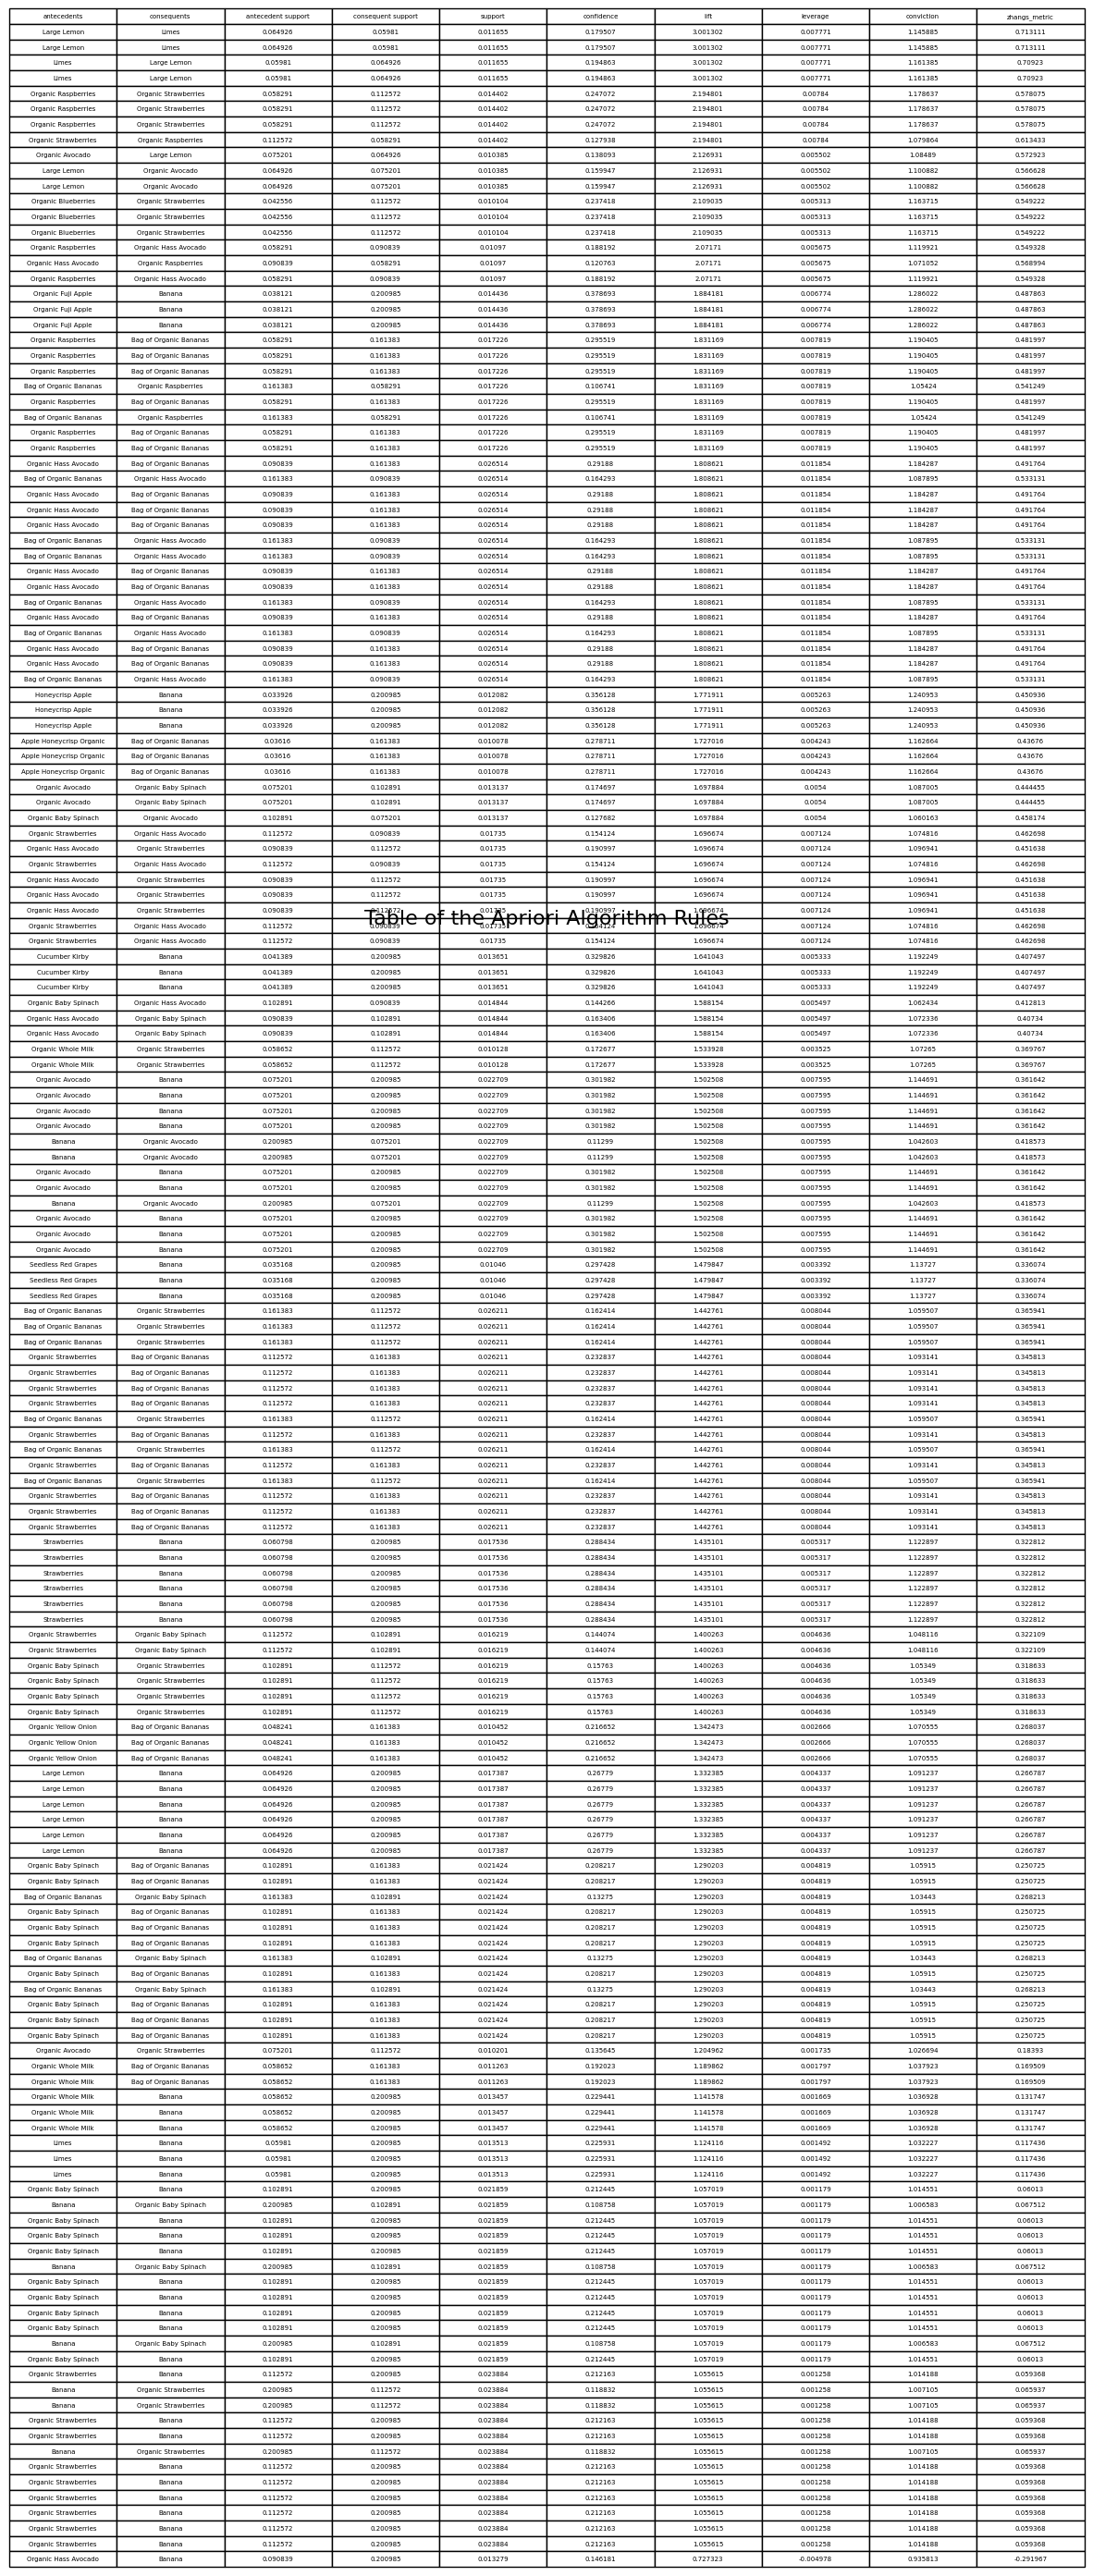

In [13]:
import pandas as pd
from scipy.sparse import csr_matrix
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Assuming 'grouped' is already defined as your list of transactions
te = TransactionEncoder()
te_ary = te.fit_transform(grouped)
sparse_matrix = csr_matrix(te_ary)
df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=te.columns_)

# Define an empty DataFrame to store all the rules
all_rules = pd.DataFrame()

# Testing different thresholds for support and confidence
for support in [0.01, 0.015, 0.02]:  # Adjust these values as needed
    for confidence in [0.1, 0.15, 0.2]:  # Adjust these values as needed
        frequent_itemsets = apriori(df, min_support=support, use_colnames=True, max_len=3, low_memory=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        if not rules.empty:
            # Concatenate all rules found for this set of thresholds
            all_rules = pd.concat([all_rules, rules], ignore_index=True)

# Now that we have the optimized results, let's format the table similar to the one in the image
# Select and rename relevant columns for clarity
all_rules = all_rules[['antecedents', 'consequents', 'antecedent support', 'consequent support',
                       'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']]

# To match the format of the image: sorting by 'lift' and rounding values
all_rules['antecedents'] = all_rules['antecedents'].apply(lambda x: ', '.join(list(x)))  # Convert frozenset to readable format
all_rules['consequents'] = all_rules['consequents'].apply(lambda x: ', '.join(list(x)))  # Convert frozenset to readable format
all_rules = all_rules.sort_values(by='lift', ascending=False).round(6)

# Display the table in a nicely formatted way using pandas
print(all_rules)

# Optionally, if you want to save it as a CSV file:
all_rules.to_csv('/content/drive/My Drive/optimized_association_rules.csv', index=False)

# Display the table as in the image
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.table(cellText=all_rules.values, colLabels=all_rules.columns, loc='center', cellLoc='center')
plt.title("Table of the Apriori Algorithm Rules", fontsize=16)
plt.show()


In [14]:
# # Merge the datasets to include all products for ARM (no filter)
# merged = order_products_prior.merge(orders, on='order_id').merge(products, on='product_id')

# # Grouping all products purchased in each order into lists
# grouped = merged.groupby('order_id')['product_name'].apply(list)

# # Test lower support and confidence values to capture niche product pairings
# all_rules = pd.DataFrame()  # Initialize an empty DataFrame to store rules

# for support in [0.005, 0.01]:  # Lower support to explore less frequent associations
#     for confidence in [0.05, 0.1]:  # Slightly lowering confidence
#         frequent_itemsets = apriori(df, min_support=support, use_colnames=True, max_len=3, low_memory=True)
#         rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
#         if not rules.empty:
#             # Concatenate all rules found for this set of thresholds
#             all_rules = pd.concat([all_rules, rules], ignore_index=True)

# # Format and display the rules as before
# all_rules = all_rules[['antecedents', 'consequents', 'antecedent support', 'consequent support',
#                        'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']]

# # Convert frozensets to readable format
# all_rules['antecedents'] = all_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
# all_rules['consequents'] = all_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# # Sort by lift to focus on the strongest associations
# all_rules = all_rules.sort_values(by='lift', ascending=False).round(6)

# # Save the results
# all_rules.to_csv('/content/drive/My Drive/refined_association_rules.csv', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              antecedents           consequents  antecedent support  \
42            Large Lemon                 Limes            0.064926   
74            Large Lemon                 Limes            0.064926   
75                  Limes           Large Lemon            0.059810   
43                  Limes           Large Lemon            0.059810   
81    Organic Raspberries  Organic Strawberries            0.058291   
..                    ...                   ...                 ...   
20                 Banana  Organic Strawberries            0.200985   
19   Organic Strawberries                Banana            0.112572   
162  Organic Strawberries                Banana            0.112572   
82   Organic Strawberries                Banana            0.112572   
8    Organic Hass Avocado                Banana            0.090839   

     consequent support   support  confidence      lift  leverage  conviction  \
42             0.059810  0.011655    0.179507  3.001302  0.007771 

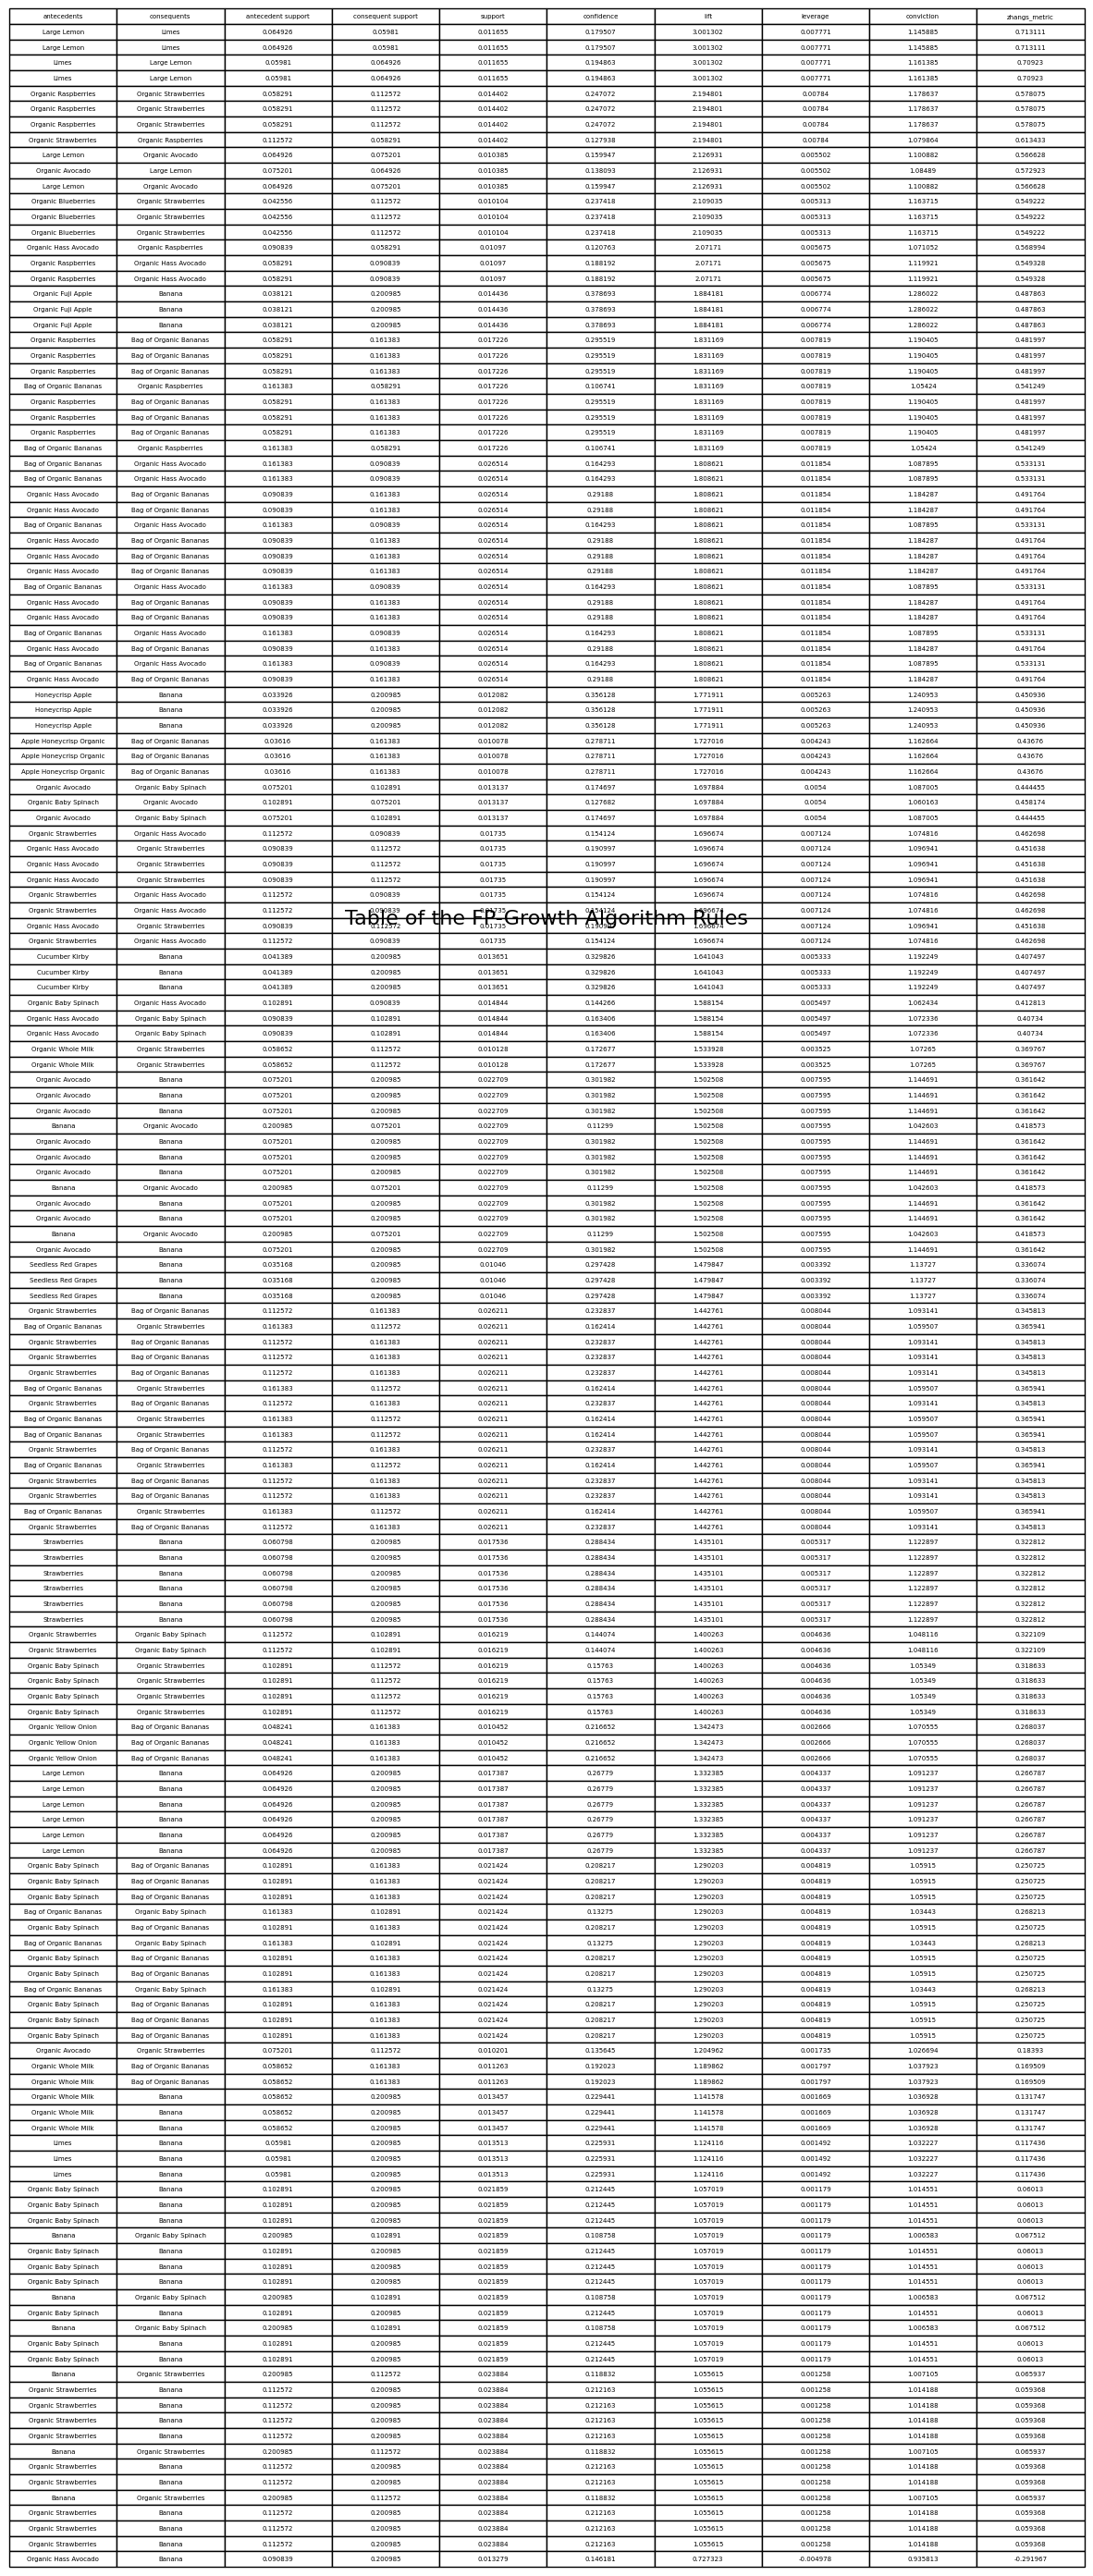

In [15]:
# FP-Growth Algorithm
from mlxtend.frequent_patterns import fpgrowth

# Define an empty DataFrame to store all the FP-Growth rules
all_rules_fp = pd.DataFrame()

# Testing different thresholds for support and confidence
for support in [0.01, 0.015, 0.02]:  # Adjust these values as needed
    for confidence in [0.1, 0.15, 0.2]:  # Adjust these values as needed
        frequent_itemsets_fp = fpgrowth(df, min_support=support, use_colnames=True)
        rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=confidence)
        if not rules_fp.empty:
            # Concatenate all rules found for this set of thresholds
            all_rules_fp = pd.concat([all_rules_fp, rules_fp], ignore_index=True)

# Select and rename relevant columns for clarity
all_rules_fp = all_rules_fp[['antecedents', 'consequents', 'antecedent support', 'consequent support',
                             'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']]

# Format the table similar to the Apriori table
all_rules_fp['antecedents'] = all_rules_fp['antecedents'].apply(lambda x: ', '.join(list(x)))  # Convert frozenset to readable format
all_rules_fp['consequents'] = all_rules_fp['consequents'].apply(lambda x: ', '.join(list(x)))  # Convert frozenset to readable format
all_rules_fp = all_rules_fp.sort_values(by='lift', ascending=False).round(6)

# Display the table in a nicely formatted way using pandas
print(all_rules_fp)

# Optionally, if you want to save it as a CSV file:
all_rules_fp.to_csv('/content/drive/MyDrive/Dissertation Preparation (masters)/MBA/optimized_fp_growth_rules.csv', index=False)

# Display the table
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.table(cellText=all_rules_fp.values, colLabels=all_rules_fp.columns, loc='center', cellLoc='center')
plt.title("Table of the FP-Growth Algorithm Rules", fontsize=16)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


            support  confidence      lift  rule_count
algorithm                                            
Apriori    0.018764    0.220134  1.540279         165
FP-Growth  0.018764    0.220134  1.540279         165


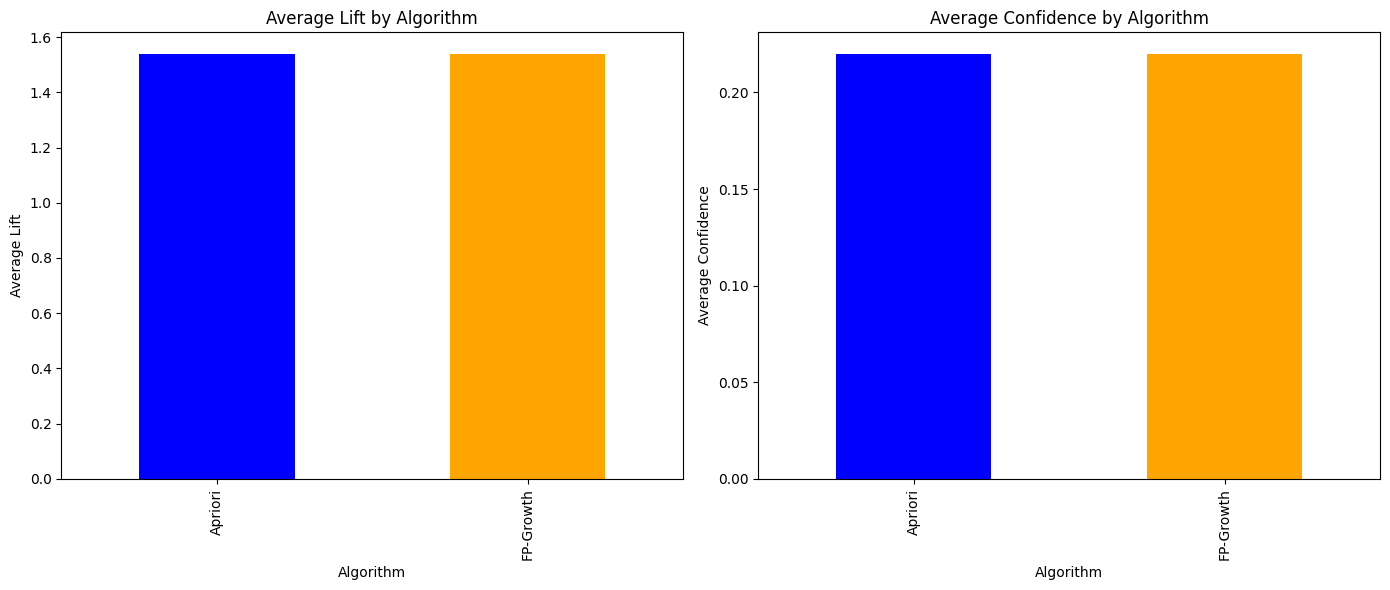

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'all_rules' contains the Apriori results and 'all_rules_fp' contains the FP-Growth results

# Add a column to each DataFrame to indicate the algorithm used
all_rules['algorithm'] = 'Apriori'
all_rules_fp['algorithm'] = 'FP-Growth'

# Combine the two DataFrames for easy comparison
combined_rules = pd.concat([all_rules, all_rules_fp], ignore_index=True)

# Display summary statistics for both algorithms
summary = combined_rules.groupby('algorithm').agg({
    'support': 'mean',
    'confidence': 'mean',
    'lift': 'mean',
    'antecedents': 'count'
}).rename(columns={'antecedents': 'rule_count'})

print(summary)

# Plotting the comparison of lift and confidence by algorithm
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot average lift
summary['lift'].plot(kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title('Average Lift by Algorithm')
axes[0].set_ylabel('Average Lift')
axes[0].set_xlabel('Algorithm')

# Plot average confidence
summary['confidence'].plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title('Average Confidence by Algorithm')
axes[1].set_ylabel('Average Confidence')
axes[1].set_xlabel('Algorithm')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Time to load and merge data: 23.05 seconds
Time to filter and group data: 66.83 seconds


<ipython-input-7-dab2da77d791>:46: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df_filtered_sparse = pd.DataFrame.sparse.from_spmatrix(sparse_matrix_filtered, columns=te_filtered.columns_)


   100% Raw Coconut Water  100% Whole Wheat Bread  2% Reduced Fat Milk  \
0                       0                       0                    0   
1                       0                       0                    0   
2                       0                       0                 True   
3                       0                       0                    0   
4                       0                       0                    0   

   Apple Honeycrisp Organic  Asparagus  Bag of Organic Bananas  Banana  \
0                         0          0                       0       0   
1                         0          0                       0       0   
2                         0          0                    True       0   
3                         0          0                       0       0   
4                         0          0                       0    True   

   Bartlett Pears  Blueberries  Boneless Skinless Chicken Breasts  ...  \
0               0            0      

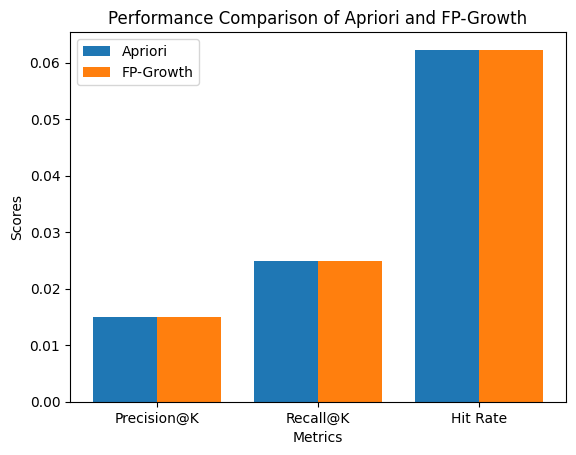

In [7]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
from scipy.sparse import vstack, csr_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import pandas as pd

# Define the path in Google Drive where files will be saved
drive_path = '/content/drive/MyDrive/Dissertation Preparation (masters)/MBA/'


start_time = time.time()
#Load the CSV files
# Load necessary CSV files with only required columns to save memory
orders = pd.read_csv('/content/instacart/orders.csv', usecols=['order_id', 'user_id'])
order_products_prior = pd.read_csv('/content/instacart/order_products__prior.csv', usecols=['order_id', 'product_id'])
products = pd.read_csv('/content/instacart/products.csv', usecols=['product_id', 'product_name'])

merged = order_products_prior.merge(orders, on='order_id').merge(products, on='product_id')
print(f"Time to load and merge data: {time.time() - start_time:.2f} seconds")
# Step 1: Define a function to create mini-batches
start_time = time.time()
# Filter the merged dataset to include only the top 100 most frequently purchased products
top_n = 100  # Adjust the number based on available memory and desired product focus
top_products = merged['product_id'].value_counts().nlargest(top_n).index
filtered_merged = merged[merged['product_id'].isin(top_products)]

# Group products purchased in each order into lists using the filtered data
grouped_filtered = filtered_merged.groupby('order_id')['product_name'].apply(list).tolist()

print(f"Time to filter and group data: {time.time() - start_time:.2f} seconds")

# Step 2: Encode the transactions using the filtered product set
start_time = time.time()
te_filtered = TransactionEncoder()
te_ary_filtered = te_filtered.fit_transform(grouped_filtered)

# Convert the numpy array directly into a sparse CSR matrix to save memory
sparse_matrix_filtered = csr_matrix(te_ary_filtered)

# Convert the sparse matrix to a pandas DataFrame with sparse columns
df_filtered_sparse = pd.DataFrame.sparse.from_spmatrix(sparse_matrix_filtered, columns=te_filtered.columns_)

# Display the first few rows of the filtered and sparse DataFrame to confirm
print(df_filtered_sparse.head())

print(f"Time to encode transactions: {time.time() - start_time:.2f} seconds")
# Step 3: Split the filtered transactions into training and testing sets
start_time = time.time()
train_transactions, test_transactions = train_test_split(grouped_filtered, test_size=0.2, random_state=42)

# Convert training transactions into a dictionary
user_transactions = {i: t for i, t in enumerate(train_transactions)}

# Convert testing transactions into a dictionary
test_transactions_dict = {i: t for i, t in enumerate(test_transactions)}

print(f"Time to split data: {time.time() - start_time:.2f} seconds")

# Step 4: Generate rules using Apriori and FP-Growth
def generate_rules(algorithm, df, support, confidence, max_len=3):
    start_time = time.time()
    if algorithm == 'apriori':
        frequent_itemsets = apriori(df, min_support=support, use_colnames=True, max_len=max_len, low_memory=True)
    elif algorithm == 'fp_growth':
        frequent_itemsets = fpgrowth(df, min_support=support, use_colnames=True, max_len=max_len)
    else:
        raise ValueError("Algorithm must be 'apriori' or 'fp_growth'")

    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
    rules['antecedents'] = rules['antecedents'].apply(lambda x: frozenset(x))
    rules['consequents'] = rules['consequents'].apply(lambda x: frozenset(x))

    print(f"Time to generate {algorithm} rules: {time.time() - start_time:.2f} seconds")
    return rules

all_rules = generate_rules('apriori', df_filtered_sparse, support=0.01, confidence=0.1, max_len=2)
all_rules_fp = generate_rules('fp_growth', df_filtered_sparse, support=0.01, confidence=0.1, max_len=2)

# Step 5: Generate recommendations based on the rules
def generate_recommendations(rules_df, user_transactions, k=5):
    recommendations = {}

    for user_id, products in user_transactions.items():
        matching_rules = rules_df[rules_df['antecedents'].apply(lambda x: x.issubset(set(products)))]
        recommended_products = []
        for _, row in matching_rules.iterrows():
            recommended_products.extend(list(row['consequents']))
        recommended_products = [p for p in recommended_products if p not in products]
        recommendations[user_id] = list(pd.Series(recommended_products).value_counts().index[:k])
    return recommendations

recommendations_apriori = generate_recommendations(all_rules, user_transactions, k=5)
recommendations_fp_growth = generate_recommendations(all_rules_fp, user_transactions, k=5)

# Step 6: Evaluate the recommendations
def evaluate_recommendations(recommendations, test_transactions, k=5):
    total_precision = 0
    total_recall = 0
    hits = 0
    total_users = len(recommendations)

    for user_id, recs in recommendations.items():
        if user_id in test_transactions:
            actual_products = set(test_transactions[user_id])
            recommended_products = set(recs[:k])

            precision = len(recommended_products.intersection(actual_products)) / k
            recall = len(recommended_products.intersection(actual_products)) / len(actual_products)
            hit = 1 if len(recommended_products.intersection(actual_products)) > 0 else 0

            total_precision += precision
            total_recall += recall
            hits += hit

    precision_at_k = total_precision / total_users
    recall_at_k = total_recall / total_users
    hit_rate = hits / total_users

    return {
        'Precision@K': precision_at_k,
        'Recall@K': recall_at_k,
        'Hit Rate': hit_rate
    }

results_apriori = evaluate_recommendations(recommendations_apriori, test_transactions_dict, k=5)
results_fp_growth = evaluate_recommendations(recommendations_fp_growth, test_transactions_dict, k=5)
print("Apriori Results:", results_apriori)
print("FP-Growth Results:", results_fp_growth)

# Save the results as files
def save_recommendations(recommendations, filename):
    rec_df = pd.DataFrame([(user, rec) for user, rec in recommendations.items()], columns=['user_id', 'recommended_products'])
    rec_df.to_csv(os.path.join(drive_path, filename), index=False)

save_recommendations(recommendations_apriori, 'apriori_recommendations.csv')
save_recommendations(recommendations_fp_growth, 'fp_growth_recommendations.csv')

def save_evaluation_results(results, algorithm_name):
    with open(os.path.join(drive_path, f'{algorithm_name}_evaluation.txt'), 'w') as f:
        for key, value in results.items():
            f.write(f'{key}: {value}\n')

save_evaluation_results(results_apriori, 'apriori')
save_evaluation_results(results_fp_growth, 'fp_growth')

def save_visualization(apriori_results, fp_results, filename):
    labels = ['Precision@K', 'Recall@K', 'Hit Rate']
    apriori_values = [apriori_results['Precision@K'], apriori_results['Recall@K'], apriori_results['Hit Rate']]
    fp_values = [fp_results['Precision@K'], fp_results['Recall@K'], fp_results['Hit Rate']]

    x = range(len(labels))
    fig, ax = plt.subplots()
    ax.bar(x, apriori_values, width=0.4, label='Apriori', align='center')
    ax.bar([p + 0.4 for p in x], fp_values, width=0.4, label='FP-Growth', align='center')
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title('Performance Comparison of Apriori and FP-Growth')
    ax.set_xticks([p + 0.2 for p in x])
    ax.set_xticklabels(labels)
    plt.legend()
    plt.savefig(os.path.join(drive_path, filename))
    plt.show()

save_visualization(results_apriori, results_fp_growth, 'performance_comparison.png')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
